In [4]:
import numpy  as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt 

### Instanciar las varaibles de entrada

In [5]:
velocidad = ctrl.Antecedent(np.arange(0,100,1), 'velocidad')
distancia = ctrl.Antecedent(np.arange(0,120,1), 'distancia')

### Instancia variable de salida 

In [6]:
frenado = ctrl.Consequent(np.arange(0,50,1), 'frenado')

### Funciones de membresia 


In [42]:
velocidad['baja'] = fuzz.gaussmf(velocidad.universe, 30, 15)
velocidad['media'] = fuzz.gaussmf(velocidad.universe, 45, 15)       
velocidad['alta'] = fuzz.gaussmf(velocidad.universe, 70, 20)

distancia['corta'] = fuzz.trimf(distancia.universe, [0,10,35])
distancia['media'] = fuzz.trimf(distancia.universe, [5,30,60])      
distancia['larga'] = fuzz.trimf(distancia.universe, [35,80,100])

### Funciones de membresia de salida 

In [44]:
frenado['suave'] = fuzz.trapmf(frenado.universe, [0,5,12,20])
frenado['moderado'] = fuzz.gaussmf(frenado.universe, 25,5)
# frenado['moderado'] = fuzz.trapmf(frenado.universe, [10,20,30,40])
frenado['fuerte'] = fuzz.trapmf(frenado.universe, [25,35,50,50])

### Graficas

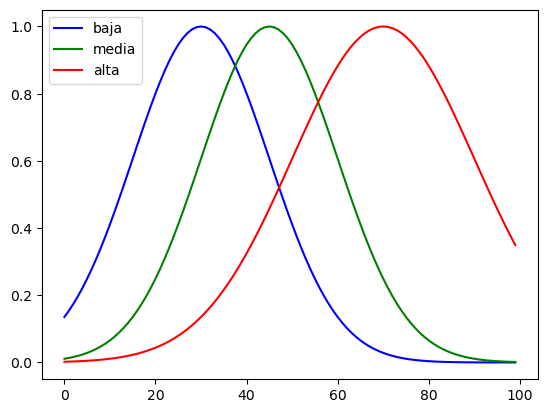

In [43]:
plt.plot(velocidad.universe, velocidad['baja'].mf, 'b', linewidth=1.5, label='baja')
plt.plot(velocidad.universe, velocidad['media'].mf, 'g', linewidth=1.5, label='media')
plt.plot(velocidad.universe, velocidad['alta'].mf, 'r', linewidth=1.5, label='alta')
plt.legend()
plt.show()

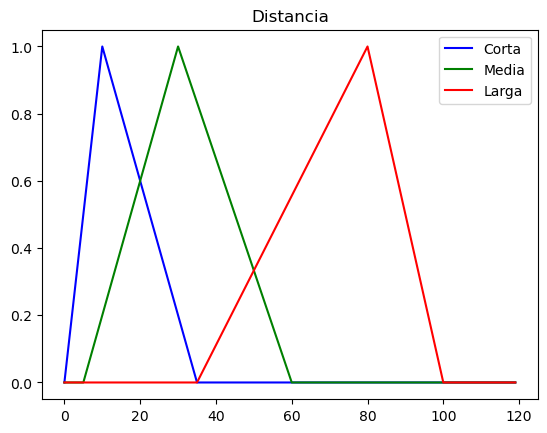

In [27]:
plt.plot(distancia.universe, distancia['corta'].mf, 'b', linewidth=1.5, label='Corta')
plt.plot(distancia.universe, distancia['media'].mf, 'g', linewidth=1.5, label='Media')
plt.plot(distancia.universe, distancia['larga'].mf, 'r', linewidth=1.5, label='Larga')
plt.title('Distancia')
plt.legend()
plt.show()

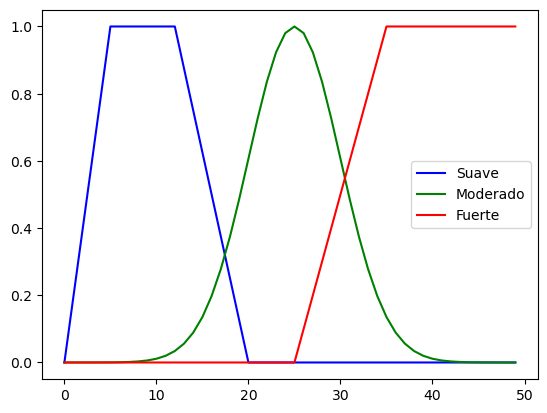

In [45]:
plt.plot(frenado.universe, frenado['suave'].mf, 'b', linewidth=1.5, label='Suave')
plt.plot(frenado.universe, frenado['moderado'].mf, 'g', linewidth=1.5, label='Moderado')
plt.plot(frenado.universe, frenado['fuerte'].mf, 'r', linewidth=1.5, label='Fuerte')
plt.legend()
plt.show()

## Definimos las reglas

In [51]:

rule1 = ctrl.Rule(velocidad['baja'] & distancia['larga'], frenado['suave'])
rule2  =ctrl.Rule(velocidad['baja'] & distancia['media'], frenado['moderado'])
rule3 = ctrl.Rule(velocidad['baja'] & distancia['corta'], frenado['fuerte'])
rule4 = ctrl.Rule(velocidad['media'] & distancia['larga'], frenado['suave'])
rule5 = ctrl.Rule(velocidad['media'] & distancia['media'], frenado['moderado'])
rule6 = ctrl.Rule(velocidad['media'] & distancia['corta'], frenado['fuerte'])
rule7 =  ctrl.Rule(velocidad['alta'] & distancia['larga'], frenado['moderado'])
rule8 = ctrl.Rule(velocidad['alta'] & distancia['media'], frenado['fuerte'])
rule9 = ctrl.Rule(velocidad['alta'] & distancia['corta'], frenado['fuerte'])

reglas = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]


In [53]:
frenad_ctrl = ctrl.ControlSystem(reglas)

In [54]:
freando_simulador = ctrl.ControlSystemSimulation(frenad_ctrl)

In [55]:
# val_entrada = 70
# distancia_entrada = 30 

# freando_simulador.input['velocidad'] = val_entrada
# freando_simulador.input['distancia'] = distancia_entrada

# freando_simulador.compute()

In [56]:
freando_simulador.output['frenado']

36.66213662357584